# Time-warped PCA analysis
*Nhat Le, November 2017*

In [1]:
import twpca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the neural data
short_psth = np.genfromtxt('./psth_short_all_neurons_171027.csv', delimiter=',')
long_psth = np.genfromtxt('./psth_long_all_neurons_171027.csv', delimiter=',')

t_points_short = 7
t_points_long = 9
n_neurons = 105

In [3]:
# Reshape the short and long raw data into tensors
reshaped_short_psth = np.reshape(short_psth, (n_neurons, t_points_short, -1))
reshaped_long_psth = np.reshape(long_psth, (n_neurons, t_points_long, -1))
duration_short = reshaped_short_psth.shape[2]
duration_long = reshaped_long_psth.shape[2]

In [4]:
# Combine short and long trials into one tensor
reshaped_short_pad = np.lib.pad(reshaped_short_psth, ((0,0), (0,0), (0,46-25)), 
                                'constant', constant_values=(0, 0))
reshaped_all_pad = np.concatenate((reshaped_short_pad, reshaped_long_psth), axis=1)

# Swap axes to feed in twpca
swapped_all = np.swapaxes(reshaped_all_pad, 0, 2)
swapped_all = np.swapaxes(swapped_all, 0, 1)

In [5]:
# Define palette used in plotting
palette_blue = sns.palettes.color_palette('Blues', t_points_short)
palette_red = sns.palettes.color_palette('Reds', t_points_long)

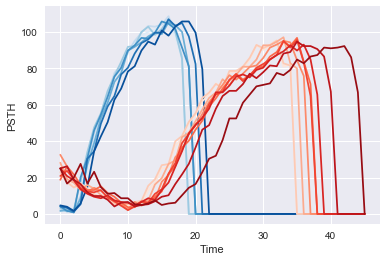

In [6]:
neuron1 = swapped_all[:,:,11]
for i in range(t_points_short):
    plt.plot(neuron1[i, :].T, color=palette_blue[i]);
    
for i in range(t_points_long):
    plt.plot(neuron1[t_points_short + i, :].T, color=palette_red[i]);    

plt.xlabel('Time')
plt.ylabel('PSTH')

In [8]:
swapped.shape

(7, 25, 105)

In [54]:
plt.plot(reshaped_short_psth[:,:19,3].T);

IndexError: index 3 is out of bounds for axis 2 with size 1

In [56]:
swapped = np.swapaxes(reshaped_short_psth, 0, 2)
swapped = np.swapaxes(swapped, 0, 1)
swapped = swapped[:,:19,12]
swapped = swapped[:,:,np.newaxis]

model = twpca.TWPCA(n_components=1)
model.fit(swapped)
aligned = model.transform()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1263.87it/s]


In [34]:
swapped.shape

(7, 19, 105)

In [37]:
swapped_long.shape

(9, 46, 105)

In [36]:
swapped_long = np.swapaxes(reshaped_long_psth, 0, 2)
swapped_long = np.swapaxes(swapped_long, 0, 1)
model_long = twpca.TWPCA(n_components=1)
model_long.fit(swapped_long)
aligned_long = model_long.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 662.84it/s]


In [9]:
model_all = twpca.TWPCA(n_components=1)
model_all.fit(swapped_all)
aligned_all = model_all.transform()

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 370.44it/s]


In [45]:
V = model.params['time']
U = model.params['neuron']


In [58]:
model.transform??

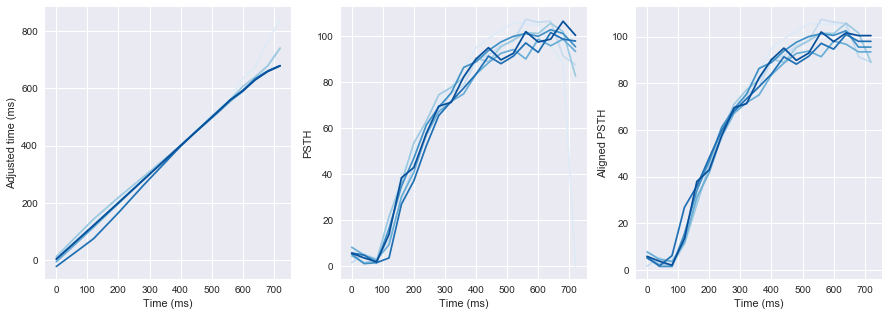

In [57]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model.params['warp']
neuron_id = 0
before_align = swapped[:,:,neuron_id]
after_align = aligned[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40



for i in range(7):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_blue[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_blue[i]); 
    ax[2].plot(timestamps, after_align[i,:], color=palette_blue[i]);
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')
plt.savefig('short_twpca_alignment.pdf')

    
    
    

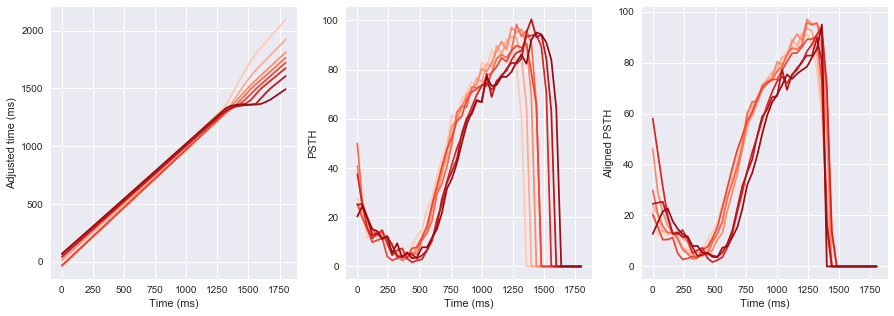

In [23]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_long.params['warp']
neuron_id = 12
before_align = swapped_long[:,:,neuron_id]
after_align = aligned_long[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40

for i in range(9):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_red[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_red[i]);    
    ax[2].plot(timestamps, after_align[i,:], color=palette_red[i]);
    
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')

plt.savefig('long_twpca_alignment.pdf')


IndexError: list index out of range

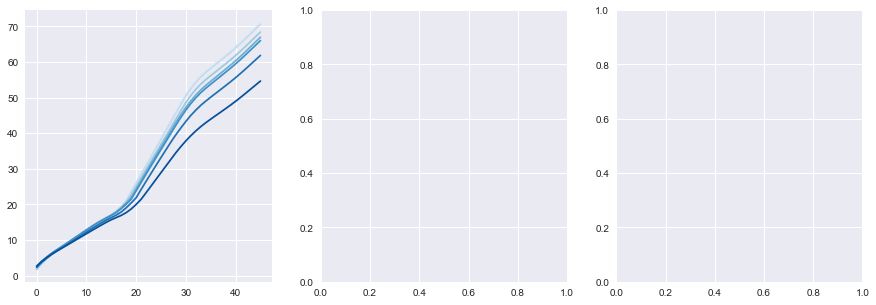

In [12]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_all.params['warp']
neuron_id = 3

for i in range(16):
    ax[0].plot(a[i,:], color=palette_blue[i]) 

before_align = swapped_all[:,:,neuron_id]
for i in range(16):
    ax[1].plot(before_align[i,:], color=palette_blue[i]);    
    
after_align = aligned_all[:,:,neuron_id]
for i in range(16):
    ax[2].plot(after_align[i,:], color=palette_blue[i]);

In [ ]:
swapped_single.shape

In [ ]:
model_single

Effort to align short and long trials... 

In [ ]:
model_single.params['warp'].shape

In [13]:
# Extract only one trial in each short/long condition
swapped_single = swapped_all[:,:,4]

# Tried: normalizing by maximum activity
#swapped_single = (swapped_single.T / np.max(swapped_single, axis=1)).T
swapped_single = np.lib.pad(swapped_single, ((0, 0), (10, 10)), 'constant', constant_values=0)

model_single = twpca.TWPCA(n_components=1)
model_single.fit(swapped_single)
aligned_single = model_single.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 730.74it/s]


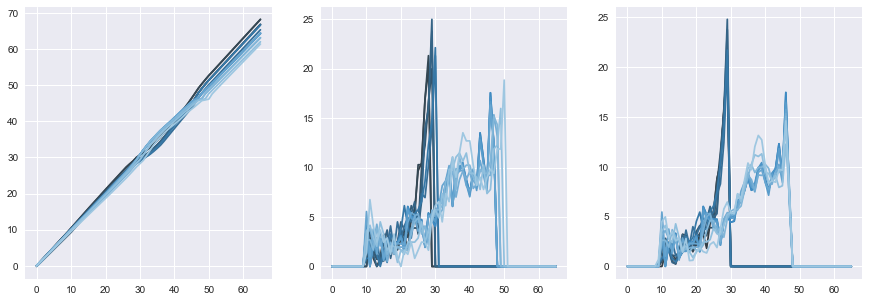

In [14]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
warp = model_single.params['warp']
palette_blues = sns.palettes.color_palette('Blues_d', 16)
neuron_id = 3

for i in range(warp.shape[0]):
    ax[0].plot(warp[i,:], color=palette_blues[i]) 
    ax[1].plot(swapped_single[i,:], color=palette_blues[i]);
    ax[2].plot(aligned_single[i,:], color=palette_blues[i]);

In [15]:
model_single.params

{'neuron': array([[-2.25002646]], dtype=float32),
 'time': array([[  1.26275016e-04],
        [  1.11957925e-04],
        [  8.38624255e-05],
        [  5.49379765e-05],
        [  3.52875504e-05],
        [  7.27600418e-05],
        [ -2.08687794e-04],
        [  2.12942809e-03],
        [ -1.53889973e-02],
        [  1.09075122e-01],
        [ -1.01818335e+00],
        [ -8.26996088e-01],
        [ -9.12702978e-01],
        [ -7.80263841e-01],
        [ -8.89574826e-01],
        [ -6.68805540e-01],
        [ -8.55806351e-01],
        [ -9.02849078e-01],
        [ -8.37370634e-01],
        [ -8.56919765e-01],
        [ -9.78306711e-01],
        [ -9.37184989e-01],
        [ -1.11211395e+00],
        [ -1.11581576e+00],
        [ -1.15093434e+00],
        [ -1.14543140e+00],
        [ -1.18681407e+00],
        [ -1.18346465e+00],
        [ -1.30529904e+00],
        [ -1.35941458e+00],
        [ -7.30289638e-01],
        [ -8.52163553e-01],
        [ -1.06205249e+00],
        [ -1.03760

In [ ]:
warp_lst = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[:t_points_short,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

In [ ]:
warp_lst_long = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[t_points_short:,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst_long.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

Doing neuron # 0 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 721.36it/s]


Doing neuron # 1 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 644.68it/s]


Doing neuron # 2 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 681.75it/s]


Doing neuron # 3 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 705.37it/s]


Doing neuron # 4 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 607.27it/s]


Doing neuron # 5 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 657.54it/s]


Doing neuron # 6 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 668.53it/s]


Doing neuron # 7 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 692.07it/s]


Doing neuron # 8 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 645.18it/s]


Doing neuron # 9 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 574.25it/s]


Doing neuron # 10 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 681.17it/s]


Doing neuron # 11 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 679.30it/s]


Doing neuron # 12 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 665.11it/s]


Doing neuron # 13 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 673.85it/s]


Doing neuron # 14 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 660.70it/s]


Doing neuron # 15 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 638.71it/s]


Doing neuron # 16 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 647.13it/s]


Doing neuron # 17 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 638.99it/s]


Doing neuron # 18 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 459.65it/s]


Doing neuron # 19 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 620.93it/s]


Doing neuron # 20 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 589.44it/s]


Doing neuron # 21 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 591.34it/s]


Doing neuron # 22 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 427.58it/s]


Doing neuron # 23 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 591.19it/s]


Doing neuron # 24 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 506.14it/s]


Doing neuron # 25 ...


100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 134.75it/s]


Doing neuron # 26 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 595.23it/s]


Doing neuron # 27 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 540.54it/s]


Doing neuron # 28 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 578.46it/s]


Doing neuron # 29 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 550.33it/s]


Doing neuron # 30 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 495.24it/s]


Doing neuron # 31 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 149.37it/s]


Doing neuron # 32 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 228.60it/s]


Doing neuron # 33 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 405.04it/s]


Doing neuron # 34 ...


100%|██████████████████████████████████████| 1000/1000 [00:14<00:00, 67.08it/s]


Doing neuron # 35 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 114.32it/s]


Doing neuron # 36 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 164.65it/s]


Doing neuron # 37 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 95.23it/s]


Doing neuron # 38 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 121.84it/s]


Doing neuron # 39 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 116.82it/s]


Doing neuron # 40 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 91.18it/s]


Doing neuron # 41 ...


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 27.93it/s]


Doing neuron # 42 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 222.57it/s]


Doing neuron # 43 ...


100%|██████████████████████████████████████| 1000/1000 [00:11<00:00, 83.54it/s]


Doing neuron # 44 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 218.94it/s]


Doing neuron # 45 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 156.05it/s]


Doing neuron # 46 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 92.98it/s]


Doing neuron # 47 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 123.03it/s]


Doing neuron # 48 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 145.33it/s]


Doing neuron # 49 ...


100%|█████████████████████████████████████| 1000/1000 [00:09<00:00, 105.31it/s]


Doing neuron # 50 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 96.90it/s]


Doing neuron # 51 ...


100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 133.49it/s]


Doing neuron # 52 ...


100%|█████████████████████████████████████| 1000/1000 [00:09<00:00, 108.95it/s]


Doing neuron # 53 ...


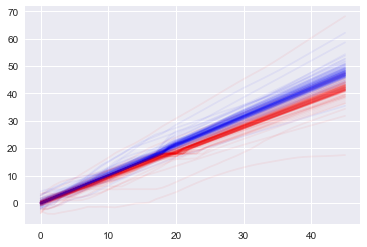

In [25]:
for warp in warp_lst:
    plt.plot(warp[0,:], 'b', alpha=0.05)
    plt.plot(warp[6,:], 'r', alpha=0.05)

In [38]:
mean_warp = np.zeros_like(warp_lst[0])
for warp in warp_lst:
    mean_warp += warp / len(warp_lst)

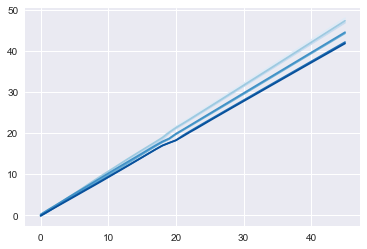

In [42]:
with sns.color_palette('Blues', 7):
    plt.plot(mean_warp.T);

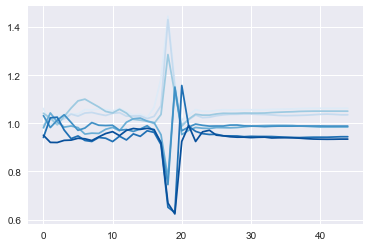

In [43]:
with sns.color_palette('Blues', 7):
    plt.plot(np.diff(mean_warp).T)